In [1]:
pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git >> /bin/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U mne >> /bin/null

Note: you may need to restart the kernel to use updated packages.


In [3]:
FILEID = "1A2a60KUPxtUboqlb8B6Q0U-OygVmS_wK"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O CKA_keras.py && rm -rf /tmp/cookies.txt
!dir

--2020-11-18 19:27:39--  https://docs.google.com/uc?export=download&confirm=&id=1A2a60KUPxtUboqlb8B6Q0U-OygVmS_wK
Resolving docs.google.com (docs.google.com)... 142.250.98.139, 142.250.98.100, 142.250.98.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.98.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-30-docs.googleusercontent.com/docs/securesc/uq1phb8r3kcoo72pgergrn4jd118klrf/7er5imqi7ho564akqmbq48psnhbgdgrp/1605727650000/06932581800131476027/12138206307133348885Z/1A2a60KUPxtUboqlb8B6Q0U-OygVmS_wK?e=download [following]
--2020-11-18 19:27:39--  https://doc-04-30-docs.googleusercontent.com/docs/securesc/uq1phb8r3kcoo72pgergrn4jd118klrf/7er5imqi7ho564akqmbq48psnhbgdgrp/1605727650000/06932581800131476027/12138206307133348885Z/1A2a60KUPxtUboqlb8B6Q0U-OygVmS_wK?e=download
Resolving doc-04-30-docs.googleusercontent.com (doc-04-30-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to

In [4]:
#%% download data
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt
#%% download data

--2020-11-18 19:27:42--  https://docs.google.com/uc?export=download&confirm=&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 142.250.98.139, 142.250.98.102, 142.250.98.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.98.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-6k-docs.googleusercontent.com/docs/securesc/4vdmbgdamk6n8usaqumtmapnhkcfm287/umvnt3hujmvhj54pre0d843cl2d8slrs/1605727650000/06932581800131476027/15954235057872334163Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download [following]
--2020-11-18 19:27:42--  https://doc-0g-6k-docs.googleusercontent.com/docs/securesc/4vdmbgdamk6n8usaqumtmapnhkcfm287/umvnt3hujmvhj54pre0d843cl2d8slrs/1605727650000/06932581800131476027/15954235057872334163Z/1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG?e=download
Resolving doc-0g-6k-docs.googleusercontent.com (doc-0g-6k-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to

In [5]:
from gcpds.utils import loaddb
import sys
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedShuffleSplit
from mne.viz import plot_topomap
#from keras_cka_v3 import Keras_CKA # import keras_cka function wrapped for sklearn.
from CKA_keras import Keras_CKA # import keras_cka function wrapped for sklearn.
from MIfunctions import * #importar todas las funciones de manejo de eeg con mne.
import os
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score, pairwise_distances
from sklearn.metrics import make_scorer

In [6]:
from os import listdir
from os.path import isfile, isdir
path='../input/gcpds-physionet'
listdir = listdir(path)

In [7]:
tau =  4
overlap=1-0.5
ti = 4
tf = 40
tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
f_frec = np.array([tti,ttf]).T
tau =  2
step = 0.5
ti = 2
tf = 6
tti = np.arange(ti,tf-tau+(step),step)
ttf = np.arange(ti+tau,tf+step,step)
vtw = np.array([tti,ttf]).T
# db = loaddb.GIGA('Giga')
for j in range(51,52):#len(listdir)):
    sbj = listdir[j]
    XX = loadmat('../input/gcpds-physionet/'+sbj+'/eeg/raw.mat')
    data=XX['X']
    data[0][0].shape
    Xraw = np.array([data[0][j] for j in range(len(data[0]))])
    fs = XX['fs'][0][0]
    ch = XX['channels'][0]
    channels_names = [ch[c][0] for c in range(len(ch))]
    yy = XX['y']
    y = np.array([yy[j][0] for j in range(len(yy))])-1
#     montage = mne.channels.read_montage(db.metadata['montage'], channels_names)
#     info = mne.create_info(channels_names, sfreq=fs, ch_types="eeg",montage=montage)
    #opt = tf.keras.optimizers.RMSprop(learning_rate=1e-1)
#     steps=[('CSP_window_time',Window_band_CSP_eppoch(fs=fs,vtw=vtw,f_frec=f_frec)),
#           ('flat',flatt()),
#           ('stand',StandardScaler()),
#           ('proy',Lasso_feats()),
#            ('cla', LDA())]
#     method = Pipeline(steps,memory='datospipeline')
#     parameters ={'CSP_window_time__ncomp':[6],
#             'proy__alpha':[1e-5,0.2,0.4,0.6,0.8,1]}
#     scores = {'acc': 'accuracy','kappa': make_scorer(cohen_kappa_score,greater_is_better=True)}    
#     cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#     grid_search = GridSearchCV(method, parameters,cv=cv,verbose=10,
#                                scoring=scores,refit='acc',n_jobs=-1)
#     #grid_search = GridSearchCV(method, parameters,cv=cv,verbose=10,
#      #                          scoring=kappa_,n_jobs=-1)
#     #try:
#     grid_search.fit(Xraw,y)
#     results = grid_search.cv_results_
#     filters = grid_search.best_estimator_['CSP_window_time'].filters
#     ncomp = grid_search.best_estimator_['CSP_window_time'].ncomp
#     #%% topoplots
#     grid_search.best_estimator_.fit(Xraw,y)
#     lasso=grid_search.best_estimator_['proy']
#     rho = abs(lasso.lasso.coef_)
#     rho = rho.reshape((len(vtw),ncomp,-1))
#     rhocka = np.zeros((len(vtw),len(f_frec),len(channels_names)))
#     ##
#     srho = np.sum(rhocka,axis=2)
#     r,c = srho.shape
#     srho = (srho/np.sum(srho)).ravel()
#     indx = np.argsort(srho)[::-1]
#     ordsrho = srho[indx]
#     cumsumrho = np.cumsum(ordsrho)
#     xx = np.arange(len(cumsumrho))+1
#     indd = np.argmin(np.sqrt((1-cumsumrho)**2+(xx/np.max(xx))**2))
#     vfs = indx[0:xx[indd]]
#     Wind_m = vfs//c
#     Freq_m = vfs-(Wind_m*c)
#     ##
#     if np.logical_and(len(f_frec)>1,len(vtw)>1):
#         for i in range(len(vtw)):
#           for j in range(len(f_frec)):
#             rhocka[i,j,:] =  np.sum(np.diag(np.abs(rho[i,:,j])).dot(np.abs(filters[i][:,:,j])),0)
#         rhocka -= np.min(rhocka)
#         rhocka /= np.max(rhocka)
#         f,ax = plt.subplots(len(vtw),len(f_frec),figsize=(20,20))
#         cmap='jet'
#         for ii in range(len(vtw)):
#           for jj in range(len(f_frec)):
#               plot_topomap(rhocka[ii,jj,:], info, axes=ax[ii,jj], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
#               ax[ii,jj].set_title('Band '+str(f_frec[jj])+'[Hz]'+'ventana '+str(vtw[ii]))
#         cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
#         sm = plt.cm.ScalarMappable(cmap=cmap)
#         sm.set_array([])
#         plt.colorbar(sm,cax=cax)
#     elif np.logical_and(len(f_frec)>1,len(vtw)==1):
#         for j in range(len(f_frec)):
#           rhocka[0,j,:] =  np.sum(np.diag(np.abs(rho[0,:,j])).dot(np.abs(filters[0][:,:,j])),0)
#         rhocka=rhocka.squeeze()
#         rhocka -= np.min(rhocka)
#         rhocka /= np.max(rhocka)
#         f,ax = plt.subplots(len(f_frec),1,figsize=(20,20))
#         cmap='jet'
#         for jj in range(len(f_frec)):
#             plot_topomap(rhocka[jj,:], info, axes=ax[jj], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
#             ax[jj].set_title('Band '+str(f_frec[jj])+'[Hz]'+'ventana '+str(vtw))
#         cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
#         sm = plt.cm.ScalarMappable(cmap=cmap)
#         sm.set_array([])
#         plt.colorbar(sm,cax=cax)  
#     else:
#         for i in range(len(vtw)):
#             rhocka[i,:] =  np.sum(np.diag(np.abs(rho[i,:,0])).dot(np.abs(filters[i][:,:,0])),0)
#         rhocka -= np.min(rhocka)
#         rhocka /= np.max(rhocka)
#         f,ax = plt.subplots(len(vtw),1,figsize=(20,20))
#         cmap='jet'
#         for ii in range(len(vtw)):
#               plot_topomap(rhocka[ii,0,:], info, axes=ax[ii], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
#               ax[ii].set_title('Band '+str(f_frec[0])+'[Hz]'+'ventana '+str(vtw[ii]))
#         cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
#         sm.set_array([])
#         plt.colorbar(sm,cax=cax)   
#     plt.savefig('sbj'+str(sbj)+'acc'+str(np.round(grid_search.best_score_,2))+'.eps',format='eps')#,dpi=300)
#     #plt.savefig('sbj'+str(sbj)+'kappa'+str(np.round(grid_search.best_score_,2))+'.png',format='png')#,dpi=300)
#     savedata ={
#         'Wind_m':Wind_m,
#         'Freq_m':Freq_m,
#         'steps':steps,
#         'f_frec':f_frec,
#         'vtw':vtw,
#         'best_param':grid_search.best_params_,
#         'rhocka':rhocka,        
#         'cv_results':results
#     }
#     #dump(savedata,'sujeto_'+str(sbj)+'_cka_featuresCSP_BCI2a_acc.joblib')
#     dump(savedata,'sujeto_'+str(sbj)+'_lasso_featuresCSP_GIGA_acc.joblib')
#     print('sbj'+str(sbj)+'acc'+str(np.round(grid_search.best_score_*100,4)))
#     !zip Results-joblib.zip ./*.joblib
#     !zip Results-images.zip ./*.eps

In [8]:
tau =  4
overlap=1-0.5
ti = 4
tf = 40
tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
f_frec = np.array([tti,ttf]).T
tau =  2
step = 0.5
ti = 2
tf = 6
tti = np.arange(ti,tf-tau+(step),step)
ttf = np.arange(ti+tau,tf+step,step)
vtw = np.array([tti,ttf]).T

j = 51
sbj = listdir[j]
XX = loadmat('../input/gcpds-physionet/'+sbj+'/eeg/raw.mat')
data=XX['X']
data[0][0].shape
Xraw = np.array([data[0][j] for j in range(len(data[0]))])
fs = XX['fs'][0][0]
ch = XX['channels'][0]
channels_names = [ch[c][0] for c in range(len(ch))]
yy = XX['y']
y = np.array([yy[j][0] for j in range(len(yy))])-1
# montage = mne.channels.read_montage(db.metadata['montage'], channels_names)
# info = mne.create_info(channels_names, sfreq=fs, ch_types="eeg",montage=montage)


In [20]:
import mne
import numpy as np
from typing import List

def get_epochs(data: np.ndarray, classes: np.ndarray,  labels:List[str], 
               tmin:int, montage_name:str, sampling_rate:int, 
               channels_names:List[str], **kwargs) -> mne.EpochsArray:
    """
    Creates a `mne.Epochs` with their respective montage information from raw data.
    
    Parameters
    ----------
    
    data
        Numpy array with the shape (trials, channels, time).
    classes
        Numpy array with the labels as integers.
    labels
        The label descriptor for each class.
    tmin
        Time in seconds before the event, is used to center the event in t=0,
        is negative.
    montage_name
        One of the montages defined in `mne.channels.get_builtin_montages()`.
    sampling_rate
        Sample frecuency.
    channels_names
        List of channels names, no matter the capitalization.

    Returns
    -------
    epochs
        The `mne.EpochsArray` object.
    """

    montage = mne.channels.make_standard_montage(montage_name)

    # Channels names with the MNE standard capitalization 
    source = channels_names
    target = montage.ch_names
    channels_names = []
    for ch_s in source:
        for ch_t in target:
            if ch_s.lower().strip() == ch_t.lower().strip():
                channels_names.append(ch_t)

    # Missing channels
    channels_missings = set(channels_names).difference(set(montage.ch_names))
    if channels_missings:
        print(f"Missing {channels_missings} channels in {montage_name} montage.\n"
              f"Missing channels will be removed from MNE Epochs")

    # Info
    info = mne.create_info(list(channels_names), sfreq=sampling_rate, ch_types="eeg")
    info.set_montage(montage_name)

    # Events
    events = [[i, 1, cls] for i, cls in enumerate(classes)]
    event_id = {e: i for i, e in enumerate(labels)}

    return mne.EpochsArray(data, info, events=events, tmin=tmin, event_id=event_id, **kwargs)

In [21]:
epochs = get_epochs(data=Xraw, classes=y, labels=['right hand', 'left hand'], tmin=-2, montage_name='standard_1005', sampling_rate=fs, channels_names=channels_names)

Not setting metadata
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


Creating RawArray with float64 data, n_channels=64, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


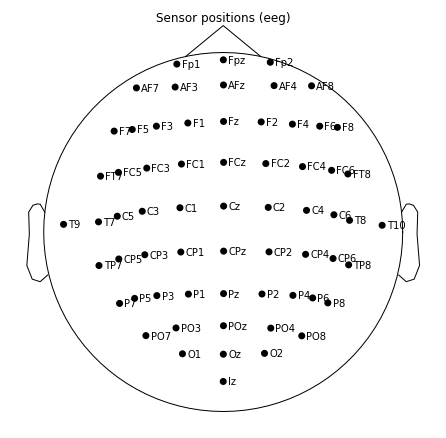

In [18]:
montage = epochs.get_montage()
montage.plot(kind='topomap', show_names=True);

In [ ]:
evoked = epochs['a'].average()

fig = plt.figure(figsize=(10, 5), dpi=90)
ax = plt.subplot(111)
evoked.plot(axes=ax, spatial_colors=True);

In [ ]:
times = np.linspace(0, 4, 6)

epochs['a'].average().plot_topomap(times,)

In [ ]:
evoked = epochs['a'].average()
evoked = evoked.filter(3, 30)

times = np.linspace(0, 4, 12)
evoked.plot_topomap(times, ncols=4, nrows=3);


In [ ]:
results['mean_test_acc']

In [ ]:
import time
for i in range(len(listdir)):
    if listdir[i] == 'S072':
        print('Pos '+str(i)+' Sub '+str(listdir[i]))